# Feature Engineering and Transformations

This notebook will present the following topics:
- [Categorical Data](#categorical)<a href='#categorical'></a>
- [Discretize Data](#discretization)<a href='#discretization'></a>
- [Numerical Data](#numerical)<a href='#numerical'></a>
- [Custom Transformations](#custom)<a href='#custom'></a>
- [Transformations](#transforming)<a href='#transforming'></a>
- [Linearity and Non-linearity](#linearity)<a href='#linearity'></a>
- [Principal Component Analysis - PCA](#pca)<a href='#pca'></a>
- [Isomap](#isomap)<a href='#isomap'></a>

After the data organization and manipulation phase and after the exploratory analysis phase, it is important to manipulate the data correctly in order to transform and adapt it for model creation.  

This process is also called Feature Engineering and is a fundamental aspect in the Machine Learning world.

This activity is fundamental and important because some models cannot reason for example using token sequences or strings, but only with numbers. \
In addition, for some types of data (categorical, images, but also numerical) it is essential to apply transformations to improve the effectiveness of a model in generating a representation.

All of the examples viewed so far assume that you have numerical data in a tidy or structure format.  
In the real world, data rarely comes in such a form.  
With this in mind, one of the more important steps in using machine learning in practice is **feature engineering** that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix for your model.

In this notebook we will cover a few common examples of feature engineering tasks: features for representing **categorical data**, features for representing text, and features for representing images.  

This notebook is based on the books:
- Python Data Science Handbook
- Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow

And the official documentation of Sklearn that we suggest to follow and see:
- https://scikit-learn.org/stable/data_transforms.html


In [2]:
import pandas as pd
import numpy as np

<a id='categorical'></a>
## Categorical Data

Let's start by defining an example dataset

In [3]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
    {'city': 'Milano', 'temperature': 18.},
    {'city': 'Roma', 'temperature': 20.},
    {'city': 'Parigi', 'temperature': 16.},
    {'city': 'Biella', 'temperature': 13},
    ]

df = pd.DataFrame(measurements)

df

,city,temperature
0,Dubai,33.0
1,London,12.0
2,San Francisco,18.0
3,Milano,18.0
4,Roma,20.0
5,Parigi,16.0
6,Biella,13.0


you can with Pandas select only the categorical columns within a dataset \
Warning: in pandas objects can also be categories (e.g. strings)

In [4]:
result = df.select_dtypes(include=['object','category'])
result

,city
0,Dubai
1,London
2,San Francisco
3,Milano
4,Roma
5,Parigi
6,Biella


You can also use this function to filter other types of data: bool, int, ...

### DictVectorizer

Imagine having to explore a temperature dataset, in this case you will surely have categorical features that refer for example to the city where the temperature has been measured or to the type of sensor etc. ...  

One of the simplest transformations in this case would be to create a handmade dataset of possible transformations to apply within our dataset.  

This operation is very convenient if you work with small categories (i.e. formed by few elements).

As in this case

We can then apply a transformation called: DictVectorizer

In [5]:
#Retrasform the dataframe to dictionary
data = df.T.to_dict().values()

In [6]:
data

dict_values([{'city': 'Dubai', 'temperature': 33.0}, {'city': 'London', 'temperature': 12.0}, {'city': 'San Francisco', 'temperature': 18.0}, {'city': 'Milano', 'temperature': 18.0}, {'city': 'Roma', 'temperature': 20.0}, {'city': 'Parigi', 'temperature': 16.0}, {'city': 'Biella', 'temperature': 13.0}])

In [7]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

#Warning, you cannot use this with pandas df
result = vec.fit_transform(data).toarray()
print(f"Shape: {result.shape}")
print(result)


Shape: (7, 8)
[[ 0.  1.  0.  0.  0.  0.  0. 33.]
 [ 0.  0.  1.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  0.  0.  0.  1. 18.]
 [ 0.  0.  0.  1.  0.  0.  0. 18.]
 [ 0.  0.  0.  0.  0.  1.  0. 20.]
 [ 0.  0.  0.  0.  1.  0.  0. 16.]
 [ 1.  0.  0.  0.  0.  0.  0. 13.]]


In [38]:
vec.get_feature_names()

['city=Biella',
 'city=Dubai',
 'city=London',
 'city=Milano',
 'city=Parigi',
 'city=Roma',
 'city=San Francisco',
 'temperature']

Be careful though, using this technique you create a sublist for each feature, so as the number of available features increases, the dataset grows disproportionately.  
To avoid creating a new line for each categorical feature, you can use a technique called **one-hot encoding**.  

Another problem in these situations is that you create columns (or rows) that are very scattered among them, to avoid the emergence of a large sparsity of data and columns you can certainly use other techniques, or, using these functions, set parameters that help us to reduce the size of the output

In [8]:
#Retrasform the dataframe to dictionary
data = df.T.to_dict().values()

In [9]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=True, dtype=int)

#Warning, you cannot use this with pandas df
result_normal = vec.fit_transform(data)
print(f"Shape: {result_normal.shape}")
print(result_normal)


Shape: (7, 8)
  (0, 1)	1
  (0, 7)	33
  (1, 2)	1
  (1, 7)	12
  (2, 6)	1
  (2, 7)	18
  (3, 3)	1
  (3, 7)	18
  (4, 5)	1
  (4, 7)	20
  (5, 4)	1
  (5, 7)	16
  (6, 0)	1
  (6, 7)	13


The size doesn't actually change, but computationally it is a numpy array, so much faster to compute and use.

### Ordinal Encoder

Another way to transform categorical features that is always very intuitive is to transform them as if they were an ordered list of possibilities that can be expressed in the form of an integer. \
Let's take an example:

In [10]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()


#Retrasform the dataframe to list
cities = df.city.T.to_dict().values()

cities_list = np.array(list(cities))

cities_list

array(['Dubai', 'London', 'San Francisco', 'Milano', 'Roma', 'Parigi',
       'Biella'], dtype='<U13')

WARNING: Sklearn works a lot with numpy arrays, so it is recommended to use this type of representation frequently, instead of using normal python lists or dictionaries. It is also often not compatible with Pandas. So always try to understand what data you have in input and what you want to transform.

For more information read here: \
https://www.quora.com/What-is-the-relationship-among-NumPy-SciPy-Pandas-and-Scikit-learn-and-when-should-I-use-each-one-of-them

In [11]:
enc.fit(cities_list.reshape(-1,1))

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [99]:
enc.transform([['Dubai'],['Roma']])

array([[1.],
       [5.]])

But watch out!!!! If I try a city that doesn't exist in my series, it won't work. \
As well as the order of encoding is very important

In [14]:
enc.transform(['Rome'])

ValueError: Expected 2D array, got 1D array instead:
array=['Rome'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

A very important concept in Sklearn is the **fit** \
Any sklearn library transformation can be applied to the starting dataset using fit. \
The fit will be the creation of the object according to the sklearn method you want to use and to apply that method on a data set you will need to do **transform**.

To avoid this double step you can simply use the function: **fit_transform** which is much more convenient and allows you to do the fit on a data set and apply the transformation immediately, like the first example.

https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models

### OneHotEncoder

Another possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K, also known as one-hot or dummy encoding. This type of encoding can be obtained with the OneHotEncoder, which transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.

To make One Hot Encoding you can either use a Pandas method or use SKLearn

In [16]:
df_oneHot = df.copy()
df_oneHot

,city,temperature
0,Dubai,33.0
1,London,12.0
2,San Francisco,18.0
3,Milano,18.0
4,Roma,20.0
5,Parigi,16.0
6,Biella,13.0


In [17]:
df_oneHot = pd.get_dummies(df_oneHot,prefix=['city'], drop_first=True)
df_oneHot

,temperature,city_Dubai,city_London,city_Milano,city_Parigi,city_Roma,city_San Francisco
0,33.0,1,0,0,0,0,0
1,12.0,0,1,0,0,0,0
2,18.0,0,0,0,0,0,1
3,18.0,0,0,1,0,0,0
4,20.0,0,0,0,0,1,0
5,16.0,0,0,0,1,0,0
6,13.0,0,0,0,0,0,0


With Pandas you can also apply One Hot Encoding considering NA, for example:

In [18]:
nan = float('nan')
missing = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
    {'city': nan , 'temperature': 0.},
    {'city': 'Milano', 'temperature': 18.},
    {'city': 'Roma', 'temperature': 20.},
    {'city': 'Parigi', 'temperature': 16.},
    {'city': '', 'temperature': 24.},
    {'city': 'Biella', 'temperature': 13},
    ]


df_missing = pd.DataFrame(missing)

df_missing

,city,temperature
0,Dubai,33.0
1,London,12.0
2,San Francisco,18.0
3,NaN,0.0
4,Milano,18.0
5,Roma,20.0
6,Parigi,16.0
7,,24.0
8,Biella,13.0


In [19]:
df_oneHot = pd.get_dummies(df_missing,prefix=['city'], drop_first=False, dummy_na=True)
df_oneHot

,temperature,city_,city_Biella,city_Dubai,city_London,city_Milano,city_Parigi,city_Roma,city_San Francisco,city_nan
0,33.0,0,0,1,0,0,0,0,0,0
1,12.0,0,0,0,1,0,0,0,0,0
2,18.0,0,0,0,0,0,0,0,1,0
3,0.0,0,0,0,0,0,0,0,0,1
4,18.0,0,0,0,0,1,0,0,0,0
5,20.0,0,0,0,0,0,0,1,0,0
6,16.0,0,0,0,0,0,1,0,0,0
7,24.0,1,0,0,0,0,0,0,0,0
8,13.0,0,1,0,0,0,0,0,0,0


With Sklean it can be done:

In [21]:
df_start = df.copy()
df_col = df_start.city.values.reshape(-1,1)
df_col

array([['Dubai'],
       ['London'],
       ['San Francisco'],
       ['Milano'],
       ['Roma'],
       ['Parigi'],
       ['Biella']], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(df_col).toarray()
X

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]])

The result is always an array of numpy...so you need to go back to the original size and insert the array again inside our starting dataframe

In [23]:
dfOneHot = pd.DataFrame(X, columns = ["City"+str(int(i)) for i in range(X.shape[1])])
result = pd.DataFrame()
result = pd.concat([df_start, dfOneHot], axis=1)
result

,city,temperature,City0,City1,City2,City3,City4,City5,City6
0,Dubai,33.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,London,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,San Francisco,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Milano,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Roma,20.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Parigi,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Biella,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Label Encoder

LabelEncoder converts each class under specified feature to a numerical value. Let’s go through the steps to see how to do it. \
LabelEncoder is very useful because it allows you to obtain a dataframe in output, without having to make any transformations. \
Returns different values for different classes always within the same column.

In [24]:
cities = df.city.tolist()
df_complete = df.copy()

In [25]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [26]:
#apply the label encoder to the dataset
le.fit(df_complete['city'])

LabelEncoder()

In [27]:
#show list of classes
list(le.classes_)

['Biella', 'Dubai', 'London', 'Milano', 'Parigi', 'Roma', 'San Francisco']

In [28]:
#transform into integers
transformation = le.transform(df['city']) 
transformation

array([1, 2, 6, 3, 5, 4, 0])

In [29]:
# try to invert a transformation using the object
list(le.inverse_transform([2,2,1,5]))

['London', 'London', 'Dubai', 'Roma']

In [266]:
# apply le on categorical feature columns
df_complete['city_transformed'] = list(transformation)

In [267]:
df_complete

,city,temperature,city_transformed
0,Dubai,33.0,1
1,London,12.0,2
2,San Francisco,18.0,6
3,Milano,18.0,3
4,Roma,20.0,5
5,Parigi,16.0,4
6,Biella,13.0,0


Warning: Using a LabelEncoder alone is not always a good idea for some models as it certainly keeps the list of features inside the dataframe in order, but they remain categorical, even if they are transformed in number. \
This is why it is often used in pairs with OneHotEncoder.

The LabelEncoder is very useful to transform categorical features to be predicted (for example for a classification experiment) compared to using it exclusively for the dataset features.

LabelEncoder and OneHotEncoder is usually need to be used together as a two steps method to encode categorical features. LabelEncoder outputs a dataframe type while OneHotEncoder outputs a numpy array. OneHotEncoder has the option to output a sparse matrix. DictVectorizer is a one step method to encode and support sparse matrix output. Pandas get dummies method is so far the most straight forward and easiest way to encode categorical features. The output will remain dataframe type. \
As my point of view, the first choice method will be pandas get dummies. But if the number of categorical features are huge, DictVectorizer will be a good choice as it supports sparse matrix output.

#### Encoding Manually Ordinal Categorical Features

Another easy way to encode categorical ordinal features is to create manual transformations (if the sorting is minimal). \
Let's consider, for example:

In [30]:
temp_cat = ['Low', 'Low', 'Medium', 'High', 'High', 'None', 'High']
df_ordinal = df.copy()
df_ordinal['category'] = temp_cat
df_ordinal

,city,temperature,category
0,Dubai,33.0,Low
1,London,12.0,Low
2,San Francisco,18.0,Medium
3,Milano,18.0,High
4,Roma,20.0,High
5,Parigi,16.0,None
6,Biella,13.0,High


In [32]:
# Create mapper
scale_mapper = {'Low':1, 
                'Medium':2,
                'High':3}

In [33]:
# Map feature values to scale
df_ordinal['Scale'] = df_ordinal['category'].replace(scale_mapper)

# View data frame
df_ordinal

,city,temperature,category,Scale
0,Dubai,33.0,Low,1
1,London,12.0,Low,1
2,San Francisco,18.0,Medium,2
3,Milano,18.0,High,3
4,Roma,20.0,High,3
5,Parigi,16.0,None,None
6,Biella,13.0,High,3


<a id='discretization'></a>
## Discretize Data

Discretization (otherwise known as quantization or binning) provides a way to partition continuous features into discrete values. Certain datasets with continuous features may benefit from discretization, because discretization can transform the dataset of continuous attributes to one with only nominal attributes.

One-hot encoded discretized features can make a model more expressive, while maintaining interpretability. For instance, pre-processing with a discretizer can introduce nonlinearity to linear models.

In [34]:
df_numerical = np.array(df['temperature'].tolist())
df_numerical = df_numerical.reshape(-1,1)
df_numerical

array([[33.],
       [12.],
       [18.],
       [18.],
       [20.],
       [16.],
       [13.]])

In [35]:
est = preprocessing.KBinsDiscretizer(n_bins=3,encode='ordinal')

In [36]:
est.fit(df_numerical)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='quantile')

In [37]:
result = est.transform(df_numerical)
print(result)

[[2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [0.]]


<a id='numerical'></a>
## Numerical Data

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In [38]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],[3,5,12],[ 2.,  0.,  0.],[ 0.,  1., -1.],[5,12,67],[42,5,3]])
X_train

array([[ 1., -1.,  2.],
       [ 3.,  5., 12.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.],
       [ 5., 12., 67.],
       [42.,  5.,  3.]])

In [39]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
print(f'Mean: {scaler.mean_}')
print(f'Scale: {scaler.scale_}')

Mean: [ 8.83333333  3.66666667 13.83333333]
Scale: [14.91550275  4.38431548 24.14826886]


In [41]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.52518064, -1.06440029, -0.49002823],
       [-0.39109197,  0.30411437, -0.07591987],
       [-0.45813631, -0.83631451, -0.5728499 ],
       [-0.59222498, -0.60822874, -0.61426073],
       [-0.25700329,  1.9007148 ,  2.20167611],
       [ 2.22363719,  0.30411437, -0.44861739]])

Scaled data has zero mean and unit variance

In [42]:
print(f'Scaled mean:{X_scaled.mean(axis=0)}')

Scaled mean:[0.00000000e+00 7.40148683e-17 0.00000000e+00]


In [43]:
print(f'Standard Deviation: {X_scaled.std(axis=0)}')

Standard Deviation: [1. 1. 1.]


#### MinMaxScaler

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

In [45]:
X_train

array([[ 1., -1.,  2.],
       [ 3.,  5., 12.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.],
       [ 5., 12., 67.],
       [42.,  5.,  3.]])

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.02380952, 0.        , 0.04411765],
       [0.07142857, 0.46153846, 0.19117647],
       [0.04761905, 0.07692308, 0.01470588],
       [0.        , 0.15384615, 0.        ],
       [0.11904762, 1.        , 1.        ],
       [1.        , 0.46153846, 0.05882353]])

It is possible to introspect the scaler attributes to find about the exact nature of the transformation learned on the training data:

In [47]:
print(f'Scale: {min_max_scaler.scale_}')
print(f'Min: {min_max_scaler.min_}')

Scale: [0.02380952 0.07692308 0.01470588]
Min: [0.         0.07692308 0.01470588]


**MaxAbsScaler** works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data

Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.

MaxAbsScaler and maxabs_scale were specifically designed for scaling sparse data, and are the recommended way to go about this. However, scale and StandardScaler can accept scipy.sparse matrices as input, as long as with_mean=False is explicitly passed to the constructor. Otherwise a ValueError will be raised as silently centering would break the sparsity and would often crash the execution by allocating excessive amounts of memory unintentionally. RobustScaler cannot be fitted to sparse inputs, but you can use the transform method on sparse inputs.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

**Working with outliers** \
If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use robust_scale and RobustScaler as drop-in replacements instead. They use more robust estimates for the center and range of your data.

It is sometimes not enough to center and scale the features independently, since a downstream model can further make some assumption on the linear independence of the features.
To address this issue you can use sklearn.decomposition.PCA with whiten=True to further remove the linear correlation across features.

#### Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [350]:
X_normalized = preprocessing.normalize(X_train)
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 0.22485951,  0.37476584,  0.89943803],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678],
       [ 0.07326056,  0.17582536,  0.98169157],
       [ 0.99049992,  0.11791666,  0.07074999]])

si può usare così oppure sempre attraverso le solite funzioni con fit e transform

<a id='custom'></a>
## Custom Transformation

Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing. You can implement a transformer from an arbitrary function with FunctionTransformer. For example, to build a transformer that applies a log transformation in a pipeline, do:

In [326]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

It is very fast and convenient to use sklearn and numpy to make these transformations, instead of implementing custom code using for example the for

#### Nota sulle trasformazioni in un progetto di Data Science

Bisogna sempre fare molta attenzione con le trasformazioni.  
Spesso in una pipeline (in particolare nella fase di predizione con nuovi dati) è necessario ricondursi nuovamente ai dati originali.
Oppure è importante trovare il modo di trasformare nuovi dati che non ci sono nel dataset in input come ad esempio delle città che non sono state utilizzate nel training.




-------------

<a id='transforming'></a>
# Transforming

During the data gathering phase, your goal was to record as much data about your observations as possible since you never know which features are going to end up being the golden ones that allow your machine learning algorithm to succeed. Due to this, there usually are a few redundant or even poor features in your dataset. <br>
*To be effective, many machine learning algorithms need their input data to be discerning, discriminating and independent.* <br>
In this notebook, we are going to discover methods to get your data behaving like that using transformers. This will help improve your own knowledge of your data, as well as improve your machine learning algorithm's performance.


<a id='linearity'></a>
## 0) Linearity VS Non-linearity

Checking the linearity or non-linearity of the dataset you are working with is fundamental to understand what kind of transformations, but above all, which models or functions you can apply. \
How can you then verify the linearity or non-linearity of a dataset?

**Funzione lineare** = can be simply defined as: input / output = constant

A linear equation is always a polynomial of degree 1 (for example x+2y+3=0). In the two dimensional cases, they always form lines; in other dimensions, they might also form planes, points, or hyperplanes. Their "shape" is always perfectly straight, with no curves of any kind. This is why we call them linear equations.

**Funzione non lineare** = Any function that is not linear is simply put, Non linear. \
Higher degree polynomials are nonlinear. Trigonometric functions (like sin or cos) are non linear. Square roots are non linear.

To found if a dataset is linear or not you can use Graphs. \
Graphs are easy if we have a single dimension (not always as we will see here) but how to takle multiple dimensional datasets?

In [48]:
#Generating some data
import numpy as np
X = np.random.randn(1,100)
c = np.random.uniform(-10,10,(100,))

Y = 4*X + c

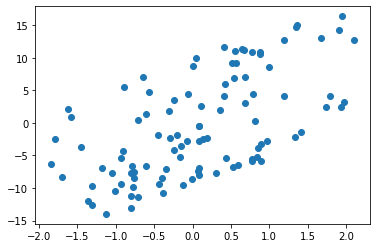

In [49]:
#Plot the data generated
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

Come si può quindi vedere da questo esempio, non è sempre facile capire se una funzione è lineare oppure no.

Come risolvere quindi questo problema oltre all'approccio grafico?

Un'idea è quello di fare ricorso allo Square Error.
Se lo square error sarà alto il dataset sarà meno lineare, mentre se lo square error sarà basso e prossimo allo zero presenterà delle linearità

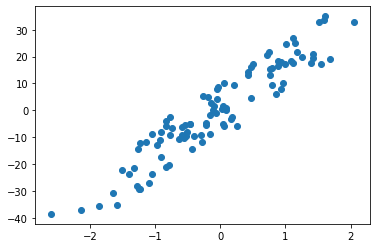

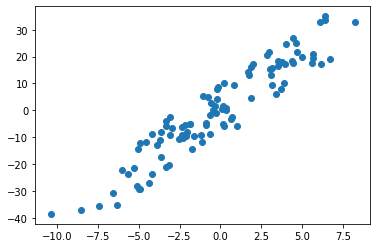

0.875467311114918


In [51]:
#LINEAR DATASET CHECK
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Generatig data
X = np.random.randn(100,1)
c = np.random.uniform(-10,10,(100,))

#adding another linear column
X = np.hstack((X,4*X))

Y = (4*X[:,1] + c)

#Plot the results
plt.scatter(X[:,0],Y)
plt.show()
plt.scatter(X[:,1],Y)
plt.show()

#Applying linear reg and check the accuracy
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression().fit(X,Y)

#Check the accuracy
from sklearn.metrics import r2_score
print(r2_score(regressor_linear.predict(X),Y))

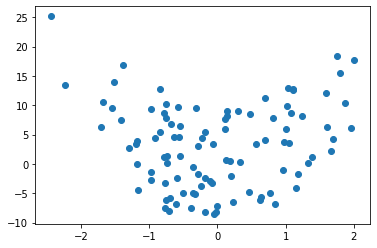

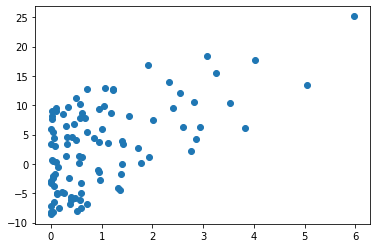

-1.0407876484358458


In [31]:
#NON LINEAR DATASET CHECK

#Generatig data
X = np.random.randn(100,1)
c = np.random.uniform(-10,10,(100,))

#adding another non linear column
X = np.hstack((X,X*X))

Y = (4*X[:,1] + c)

#Plot the results
plt.scatter(X[:,0],Y)
plt.show()
plt.scatter(X[:,1],Y)
plt.show()


#Applying linear reg and check the accuracy
from sklearn.linear_model import LinearRegression
regressor_non_linear = LinearRegression().fit(X,Y)

#Check the accuracy
from sklearn.metrics import r2_score
print(r2_score(regressor_non_linear.predict(X),Y))

Come si può evidenziare dal grafico e dai valori di R2 il secondo dataset non è lineare in quanto presenta un R2 negativo e superiore (anche se di poco al precedente). \
Inoltre dal grafico potete vedere che le due feature di ogni dataset (le X) sono nel primo molto concentrate e seguono bene una retta lineare, mentre nel secondo sono molto sparsi (anche se in questo caso abbiamo dati generati casualmente).

<a id='pca'></a>
## 1) Principal Component Analysis - PCA
PCA and other dimensionality reduction methods, have three main uses: <br>
1) Reducing the dimensionality and thus complexity of your dataset; <br>
2) Pre-process your data in preparation for other supervised learning tasks, such as regression and classification; <br>
3) To make visualizing your data easier.

![alt text](Principal_Components_print.png "PCA")

Principal Component Analysis (PCA), is a transformation that attempts to convert possibly correlated features into a set of linearly uncorrelated ones. <br>
In many real-world datasets, we aren't aware of what specifically needs to be measured to address the issue driving our data collection. <br>
So instead, we simply collect any feature we can measure, usually resulting in a higher dimensionality (*a lot of features of the dataset*) than what is truly needed. This is undesirable, but it's the only reliable way to ensure we capture the relationship modeled by our data. 
<br> 
<br>
If we have reason to believe the question we want solved can be answered using a subset of our collected features, or if the features we've collected are actually many indirect observations of some inherent property we either cannot or do not know how to directly measure, then dimensionality reduction might work for us. <br>
**PCA's approach to dimensionality reduction is to derive a set of degrees of freedom that can then be used to reproduce most of the variability of our data.** <br>
By PCA, first find the center of our data, based off its numeric features. Next, it would search for the direction that has the most variance or widest spread of values. That direction is the principal component vector, so it is added to a list. By searching for more directions of maximal variance that are orthogonal to all previously computed vectors, more principal component can then be added to the list. <br>
This set of vectors form a new feature space that can represent our samples with.<br>
PCA ensures that each newly computed view (feature) is orthogonal or linearly independent to all previously computed ones, minimizing these overlaps. PCA also orders the features by importance, assuming that the more variance expressed in a feature, the more important said feature is.<br>
With the newly computed features ordered by importance, dropping the least important features on the list intelligently reduces the number of dimensions needed to represent your dataset, with minimal loss of information. <br>
The remain group of features are the *principal components*, and they are the best possible, linearly independent combination of features that we can use to describe your data. <br>

![alt text](Principal_Component_Analysis_print.png "PCA")

You can also follow this examples to have more explanations about PCA
- https://scikit-learn.org/stable/modules/decomposition.html#kernel-pca

Try to better understand PCA with an example:

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math, random

from sklearn import preprocessing

plt.style.use('ggplot')

In [53]:
# Defining a function for scaling the features of a dataset

def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:
    
    scaled = preprocessing.StandardScaler(with_mean = False).fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    
    return scaled

SKLearn contains many methods for transforming our features by scaling them, a type of [pre-processing](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)):
- [`RobustScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)
- [`Normalizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)
- [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- [`MaxAbsScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
<br>

However in order to be effective at PCA, there are a few requirements that must be met, and which will drive the selection of your scaler. **PCA requires our data is standardized**, in other words, *it's mean should equal 0, and it should have unit variance*.

To understand why is important to scale the features, see this links:
- https://www.researchgate.net/post/In_which_case_data_need_to_be_normalized_before_PCA_Cluster_analysis
- https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca/69159
- https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance
- https://www.quora.com/Why-is-it-beneficial-to-center-and-normalize-the-data-before-running-Principal-Component-Analysis-on-it

SKLearn's regular `Normalizer()` doesn't zero out the mean of your data, it only clamps it, so it could be inappropriate to use depending on your data. `MinMaxScaler` and `MaxAbsScaler` both fail to set a unit variance, so you won't be using them here either. `RobustScaler` can work, again depending on your data (watch for outliers!). So for this assignment, we're going to use the `StandardScaler`. 

In [54]:
# Defining a function for visualizations

def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax


In [55]:
scaleFeatures = True

Load up the dataset for doing a PCA analysis. <br>
We will use the dataset of [Chronic Kidney Disease](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease)

In [56]:
kidn_dis = pd.read_csv('kidney_disease.csv')
kidn_dis.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [57]:
kidn_dis.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [58]:
# Investigating the main characteristic of the dataset

print("Shape of the dataset:", kidn_dis.shape)


Shape of the dataset: (400, 26)


In [59]:
kidn_dis.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [60]:
kidn_dis.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [61]:
kidn_dis.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [62]:
# Count na
kidn_dis.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [63]:
# Drop the id column
kidn_dis = kidn_dis.drop(['id'], axis = 1)

# Drop any na
kidn_dis = kidn_dis.dropna(axis=0)
kidn_dis.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


**Pay attention to the index rows!** After a dropna some rows has been deleted, it could be better to [reset_index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) the dataframe:

In [64]:
kidn_dis.reset_index(inplace = True)
kidn_dis.head()

,index,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [65]:
kidn_dis.isnull().sum()

index             0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [66]:
print("After dropping na, the rows of the dataset are:", kidn_dis.shape[0])

After dropping na, the rows of the dataset are: 158


The actual label feature will be removed prior to executing PCA, since it's unsupervised.<br> 
We're only labeling by color so we can see the effects of PCA:

In [67]:
# We define color red if the record is 'ckd' for the features classification, while green if it is 'notckd'
labels = ['red' if i=='ckd' else 'green' for i in kidn_dis.classification]

For semplicity of calculation, we will remove maintain only numeric columns

In [68]:
kidn_dis_2 = kidn_dis.loc[:, ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']]
kidn_dis_2.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
1,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5
2,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8
3,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6
4,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7


In [69]:
kidn_dis_2.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
dtype: object

PCA Operates based on variance. The variable with the greatest variance will dominate.

In [70]:
kidn_dis_2.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000


Each Standard deviation is a lot of different from each other; so it is necessary scaling the datas:

In [71]:
df = kidn_dis_2
if scaleFeatures: df = scaleFeaturesDF(df)

New Variances:
 age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.006369
bgr     1.006369
bu      1.006369
sc      1.006369
sod     1.006369
pot     1.006369
hemo    1.006369
dtype: float64
New Describe:
               age          bp          sg          al          su         bgr  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean     3.205267    6.647298  186.056041    0.566122    0.312233    2.028946   
std      1.003180    1.003180    1.003180    1.003180    1.003180    1.003180   
min      0.388021    4.488347  183.342676    0.000000    0.000000    1.081348   
25%      2.538305    5.386016  186.079134    0.000000    0.000000    1.498440   
50%      3.265844    7.181355  186.079134    0.000000    0.000000    1.784225   
75%      3.880211    7.181355  186.991287    0.709899    0.000000    2.035252   
max      5.367625    9.874362  186.991287    2.839596    6.166608    7.569438   

               bu          sc        

To get started, **import PCA from sklearn.decomposition** and then create a new instance of the model setting the *n_components* parameter to the number of dimensions you wish to keep. This value has to be less than or equal to the number of features in our original dataset, since each computed component is a linear combination of our original features. <br>
The second parameter, *svd_solver*, dictates if a full singular value decomposition should be preformed on our data, or a randomized truncated one. If we decide to use randomized, be sure to seed the random_state variable whenever if we intend on producing replaceable results.

Once we've fit the model against our dataframe, we can use it to transform our dataset's observatios (or any other observation that share its feature space) into the newly computed, principal component feature space with the **.transform()** method. <br>
This transformation is bidirectional, so we can recover our original feature values using **.inverse_transform()** so long as we don't drop any components. If even one component was removed, then after performing the inverse transformation back to the regular feature space, there will be some signs of information loss proportional to which component was dropped.

Run [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on our dataset, reducing it to 2 principal components.

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
PCA(copy=True, n_components=2, whiten=False)
T = pca.transform(df)

There are a few other interesting model attribute that SciKit-Learn exposes to us after we've trained our PCA model with the .fit() method: <br>
- **components_**: These are our principal component vectors and are linear combinations of our original features. As such, they exist within the feature space of our original dataset.
- **explained_variance_**: This is the calculated amount of variance which exists in the newly computed principal components.
- **explained_variance_ratio_**: Normalized version of *explained_variance_* for when our interest is with probabilities.

In [73]:
pca.explained_variance_ratio_

array([0.46887433, 0.11861083])

Features by importance:
 [(3.742707961689759, 'bgr'), (3.6582171461003554, 'su'), (3.301055817719971, 'sc'), (3.213562778109233, 'bu'), (3.0289895717843374, 'hemo'), (3.005954104973676, 'al'), (2.7191175570104846, 'sg'), (2.6796247845309904, 'sod'), (2.180753340315678, 'age'), (1.5558908768066355, 'bp'), (1.0207934019176832, 'pot')]


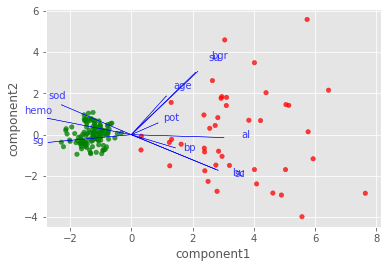

In [74]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

In [75]:
T.head()

,component1,component2
0,3.204188,-1.491743
1,2.799523,-2.747285
2,3.109582,1.810783
3,4.219809,0.684029
4,2.849842,-0.800630


After doing a PCA, we'll lost the header of the dataframe, so it could be difficult understand which features of the dataset could describe hypotetical linear relationship between the datas. <br>
To interpret each component, we must compute the correlations between the original data and each principal component. <br>
These correlations are obtained using the correlation procedure. In the variable statement we include the two principal components, "component1 and component2", in addition to all eleven of the original variables. 

We will note that if we look at the principal components themselves, then there is zero correlation between the components.

In [76]:
# Concating PCA's dataframe and starting dataset
df_corr = pd.concat([T, df], axis = 1)

In [77]:
df_corr.head()

,component1,component2,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,3.204188,-1.491743,3.104169,6.283685,183.342676,2.839596,0.000000,1.807396,1.185307,1.238648,14.868030,0.721432,3.898271
1,2.799523,-2.747285,3.427520,8.079024,186.079134,1.419798,0.000000,1.081348,2.264782,2.346912,15.269869,1.067719,3.306569
2,3.109582,1.810783,4.074221,6.283685,184.254829,2.129697,0.000000,5.870176,1.269971,0.880092,17.546955,1.212005,3.759047
3,4.219809,0.684029,4.397572,7.181355,184.254829,2.129697,2.466643,2.425310,1.904957,1.336436,17.413009,1.846865,1.949135
4,2.849842,-0.800630,3.944881,7.181355,185.166981,1.419798,0.000000,2.672475,3.132596,1.271244,18.082740,1.500578,2.680061


In [78]:
corr_matrix = df_corr.corr()
corr_matrix

,component1,component2,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
component1,1.000000e+00,1.332708e-16,0.337272,0.422522,-0.800703,0.892647,0.619927,0.642218,0.815133,0.837989,-0.672209,0.254235,-0.864567
component2,1.332708e-16,1.000000e+00,0.380518,-0.129321,-0.076072,-0.028140,0.614101,0.624447,-0.342387,-0.350963,0.293755,0.113870,0.172929
age,3.372723e-01,3.805183e-01,1.000000,0.079712,-0.277303,0.253380,0.207711,0.301915,0.190636,0.189721,-0.102933,0.006866,-0.245645
bp,4.225218e-01,-1.293209e-01,0.079712,1.000000,-0.198897,0.322507,0.243828,0.190113,0.316287,0.386551,-0.224710,0.127801,-0.282365
sg,-8.007031e-01,-7.607223e-02,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,-0.544781,-0.545319,-0.563122,0.539285,-0.075057,0.682086
al,8.926465e-01,-2.814049e-02,0.253380,0.322507,-0.712331,1.000000,0.521448,0.518123,0.661940,0.702889,-0.599334,0.209492,-0.784745
su,6.199269e-01,6.141015e-01,0.207711,0.243828,-0.448477,0.521448,1.000000,0.730050,0.312259,0.347196,-0.242491,0.271954,-0.385511
bgr,6.422178e-01,6.244471e-01,0.301915,0.190113,-0.544781,0.518123,0.730050,1.000000,0.326496,0.331284,-0.284968,0.102226,-0.434158
bu,8.151334e-01,-3.423872e-01,0.190636,0.316287,-0.545319,0.661940,0.312259,0.326496,1.000000,0.896094,-0.492778,0.245427,-0.712196
sc,8.379886e-01,-3.509633e-01,0.189721,0.386551,-0.563122,0.702889,0.347196,0.331284,0.896094,1.000000,-0.532575,0.141896,-0.723937


([<matplotlib.axis.YTick at 0x1c6c40eccc0>,
 <a list of 13 Text yticklabel objects>)

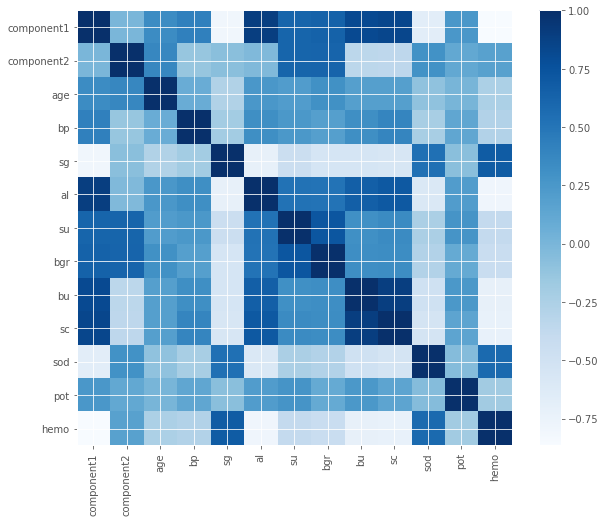

In [28]:
# Create a figure
fig = plt.figure(figsize=(10,8))

plt.imshow(df_corr.corr(), cmap = plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df_corr.columns))]
plt.xticks(tick_marks, df_corr.columns, rotation='vertical')
plt.yticks(tick_marks, df_corr.columns)

Interpretation of the principal components is based on finding which variables are most strongly correlated with each component, i.e., which of these numbers are large in magnitude, the farthest from zero in either direction. Which numbers we consider to be large or small is of course is a subjective decision. You need to determine at what level the correlation is of importance

From the visualization it is possible notice that component 1 is more correlated with 'sc', 'bu', 'hemo' and 'al' feature, while component 2 is more correlated with 'bgr'.

#### Weaknesses of PCA <br>
1)  PCA is sensitive to the scaling of our features. PCA maximizes variability based off of variance, and then projects our original data on these directions of maximal variances.<br><br>
2) PCA is fast, but for very large datasets it might take a while to train.  If you're willing to sacrifice a bit of accuracy for computational efficiency, SciKit-Learn allows us to solve PCA using a offers an approximate matrix solver called *RandomizedPCA*. <br> <br>
3) PCA will only, therefore, be able to capture the underlying linear shapes and variance within our data and cannot discern any complex, nonlinear intricacies. For such cases, we will have to make use different dimensionality reduction algorithms, such as [*Isomap*](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html).

The PCA object is very useful, but has certain limitations for large datasets. The biggest limitation is that PCA only supports batch processing, which means all of the data to be processed must fit in main memory. The IncrementalPCA object uses a different form of processing and allows for partial computations which almost exactly match the results of PCA while processing the data in a minibatch fashion. IncrementalPCA makes it possible to implement out-of-core Principal Component Analysis either by:

Finally, PCA simply performs a rotation of the given coordinate axes. Rotation is a linear operator. \
But the axis frame returned by PCA (the eigenspace) captures every bit of the variance of the original data. \
What you would like to do, however, is to drop axes with small eigenvalues (weights) and proceed on a smaller data set. If your data has nonlinear structure, as most does, then PCA will have a larger number of dimensions with nonzero weights. \
Remember that the objective of PCA is to *minimize* the number of dimensions with significant weight. 

<a id='isomap'></a>
## 2) Isomap <br>
Similar to PCA, *Isomap is also an unsupervised learning technique that reduces the dimensionality of our dataset.* <br>
No labels or classifications are needed to guide it except our raw data. <br>
**PCA is faster than Isomap and works well in most situations, but its limitation is that it assumes a linear relationship exist between your features.** <br>
What happens when your data has a non-linear structure? *It is necessary to use Isomap*. <br><br>
Isomap operates by first computing each record's nearest neighbors. This is done by comparing each sample to every other sample in the dataset. only a sample's K-nearest samples qualify for being included in its nearest-neighborhood samples list. 
<br>
A neighborhood graph is then constructed by linking each sample to its k-nearest neighbors. <br>

Isomap is able to intelligently recover and estimate a lower-dimensional embedding, also known as a manifold, by traversing the shortest distances between samples, hopping along through the calculated neighborhood map. <br>It is with this map that Isomap calculates a projection, or reduced dimensional embedding that represents your dataset through multi-dimensional scaling.
<br>
<br>
So long as the underlying relationship is non-linear, another usage of Isomap is for grouping and identifying of similar variations in similar data samples. Due to this, it is extremely useful as a preprocessor step before conducting supervised learning tasks, such as classification or regression. <br>
Isomap's benefits also include visualization and data compression.

https://blog.paperspace.com/dimension-reduction-with-isomap/

Try to reduced the dimensionality of *face_data* dataset with PCA and Isomap:

In [29]:
import scipy.io

from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

In [30]:
def Plot2D(T, title, x, y, num_to_plot=40):
    
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
        img = df.iloc[img_num,:].values.reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100, extent=(x0, x1, y0, y1))
    
    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

In [31]:
mat = scipy.io.loadmat('face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))
# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].values.reshape(num_pixels, num_pixels).T.reshape(-1)

Reduce the dataframe df down to three components. Once we've done that, call *Plot2D*.<br>
The format is: **Plot2D(T, title, x, y, num_to_plot=40)**:<br>
- *T*: Our transformed data, stored in an NDArray <br>
- *title*: The chart's title <br>
- *x*: Index of the principal component you want displayed on the x-axis; set it to 0 or 1 <br>
- *y* Index of the principal component you want displayed on the y-axis; set it to 1 or 2

In [32]:
from sklearn import preprocessing
from sklearn import manifold

def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:
    
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

scaleFeatures = True

In [33]:
if scaleFeatures: df = scaleFeaturesDF(df)

New Variances:
 0       1.001435
1       1.001435
2       1.001435
3       1.001435
4       1.001435
5       1.001435
6       1.001435
7       1.001435
8       1.001435
9       1.001435
10      1.001435
11      1.001435
12      1.001435
13      1.001435
14      1.001435
15      1.001435
16      1.001435
17      1.001435
18      1.001435
19      1.001435
20      1.001435
21      1.001435
22      1.001435
23      1.001435
24      1.001435
25      1.001435
26      1.001435
27      1.001435
28      1.001435
29      1.001435
          ...   
4066    1.001435
4067    1.001435
4068    1.001435
4069    1.001435
4070    1.001435
4071    1.001435
4072    1.001435
4073    1.001435
4074    1.001435
4075    1.001435
4076    1.001435
4077    1.001435
4078    1.001435
4079    1.001435
4080    1.001435
4081    1.001435
4082    1.001435
4083    1.001435
4084    1.001435
4085    1.001435
4086    1.001435
4087    1.001435
4088    1.001435
4089    1.001435
4090    0.000000
4091    0.000000
4092    0.00000

In [34]:
from sklearn.manifold import Isomap

iso = manifold.Isomap(n_neighbors = 3, n_components=3)
iso.fit(df)
Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_neighbors= 3, neighbors_algorithm='auto')
T1 = iso.transform(df)

As with PCA, **n_components** is the number of features we want our dataset projected onto, and **n_neighbors** defines the neighborhood size used to create the node neighborhood map. <br>
The larger our *n_neighbors* value is, the longer it will take to calculate the node neighborhood map.<br>
Unlike PCA, Isomap transformations are unidirectional so we will not be able to .inverse_transform() our projected data back into our original feature space, even if it has the same number of dimensions as our original dataset.

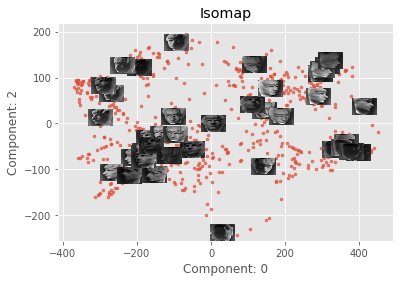

In [105]:
Plot2D(T1, 'Isomap', 0, 2, num_to_plot=40)

With a representation of 2 components out of 3, it is possible descrive the face data.

#### Weaknesses of Isomap 
1) Running Isomap is a lot slower than PCA since a lot more is happening under the hood, particularly for large n_neighbors values, but it provides a simple way to analyze and manipulate high dimensional samples in terms of its intrinsic nonlinear degrees of freedom. <br>
2) Isomap is also a bit more sensitive to noise than PCA. <br>
3) When using unsupervised dimensionality reduction techniques, be sure to use the feature scaling on all of your features because the nearest-neighbor search that Isomap bases your manifold on will do poorly if you don't, and PCA will prefer features with larger variances.

**Some useful links:**
- [Interpreting PCA](https://newonlinecourses.science.psu.edu/stat505/node/54/); <br>
- [Another method for interpreting PCA](http://www.stat.cmu.edu/~cshalizi/350/lectures/10/lecture-10.pdf); <br>
- [Interactive PCA Demo](http://setosa.io/ev/principal-component-analysis/); <br>
- [A tutorial on Principal Components Analysis](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)<br>
- [Stanford Isomap Paper](http://web.mit.edu/cocosci/Papers/sci_reprint.pdf) <br>

With this paragraph ends the notebook "Transforming", the next notebook will be "Modeling".
<br><br>
- [Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>
<br><br>
If you have any doubts, you can write to us on Teams!<br>
See you soon!

#### Others

There are many other methods that can be used in addition to these two presented. \
Another widely used method is the PCA Kernel for non-linear datasets.

We will not go into these other methods, but if you are interested you can read more about them by reading these links.

**Kernel PCA** \

Info and documentation \
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Kernel PCA \
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA

Incremental PCA \
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html#sklearn.decomposition.IncrementalPCA


**Independent Component Analysis**
Info and documentation \ 
https://blog.paperspace.com/dimension-reduction-with-independent-components-analysis/


![alt text](Kernel_PCA_print.png "Kernel PCA")